### Tugas Praktikum

### Tugas 1: Multiple Linear Regression

Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

Lakukan feature scaling jika diperlukan.

Buat model multiple linear regression menggunakan Scikit-Learn.

Latih model pada data latih dan lakukan prediksi pada data uji.

Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

**Catatan Tambahan:**

Pastikan untuk memberikan penjelasan singkat tentang dataset yang digunakan, termasuk deskripsi variabel-variabel yang relevan.

Tampilkan visualisasi data yang relevan seperti scatter plot atau grafik lainnya jika diperlukan untuk pemahaman yang lebih baik.

Analisis hasil yang Anda dapatkan dalam tugas praktikum Anda.

### Langkah 1: Import Library

In [1]:
# import package
import numpy as np
import pandas as pd

### Langkah 2: Baca Data

In [14]:
# baca data
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Langkah 3: Pemahaman Terhadap Data

In [15]:
# ukuran data
data.shape

# info data
data.info()

# deskripsi data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Langkah 4: Visualisasi Data

In [17]:
# import library untuk visualisasi
import matplotlib.pyplot as plt 
import seaborn as sns

c:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


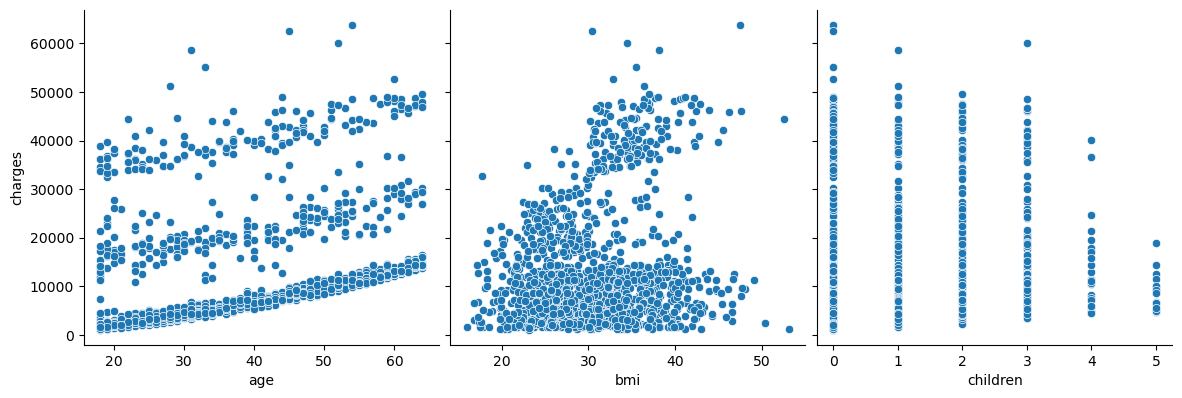

In [19]:
# operasi visualisasi
sns.pairplot(data, x_vars=['age', 'bmi','children'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

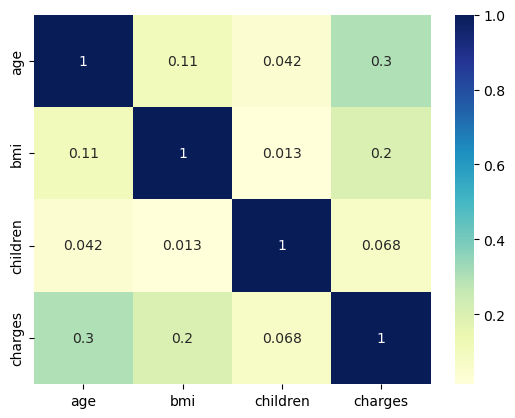

In [20]:
# Pilih hanya kolom numerik dari dataset
numerik_data = data.select_dtypes(include=[np.number])

# visualisasi korelasi dengan heatmap
sns.heatmap(numerik_data.corr(), cmap="YlGnBu", annot=True)
plt.show()

### Langkah 5: Mengonversi Variabel Kategorikal

In [12]:
# Mengonversi variabel kategorikal menjadi variabel dummy
X = pd.get_dummies(X, drop_first=True)
X.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


### Langkah 6: Pemisahan Data Latih dan Data Uji

In [21]:
from sklearn.model_selection import train_test_split

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Langkah 7: Feature Scaling (Opsional)

In [22]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Langkah 8: Membuat dan Melatih Model Multiple Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression

# Membuat model regresi linier
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)


LinearRegression()

### Langkah 9: Prediksi pada Data Uji

In [24]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menampilkan 5 hasil prediksi teratas
print(y_pred[:5])


[ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]


### Langkah 10: Evaluasi Model

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)

# Menghitung Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Menghitung Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Menghitung Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# Menampilkan hasil evaluasi
print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


R-squared: 0.7835929767120722
MAE: 4181.194473753654
MSE: 33596915.85136149
RMSE: 5796.284659276275


### Langkah 11: Visualisasi Data dan Analisis Hasil

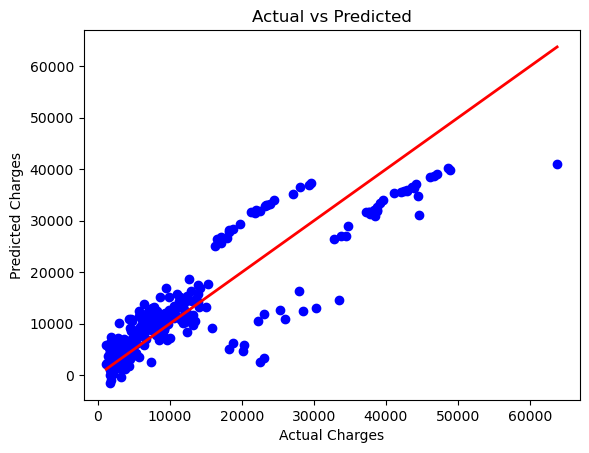

In [28]:
import matplotlib.pyplot as plt

# Membuat scatter plot dari nilai aktual vs nilai prediksi
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()
